In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics roboflow opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="ObU7QCpPcE9S8ZMvcc2Z")
project = rf.workspace("drone-detection-jfxe4").project("test-guvyo")
version = project.version(1)
dataset = version.download("yolov8", location="/content/drive/MyDrive/Drone_Dataset")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Drone_Dataset"
print("Dataset files:", os.listdir(dataset_path))


Dataset files: ['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid', 'data.yaml']


In [ ]:
model = YOLO("yolov8s.pt")
# Train on the dataset
model.train(data=f"{dataset_path}/data.yaml", epochs=60, imgsz=640, batch=8, workers=2)


100%|██████████| 21.5M/21.5M [00:00<00:00, 279MB/s]


Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Drone_Dataset/data.yaml, epochs=60, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 108MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 347MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Drone_Dataset/train/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Drone_Dataset/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.03G      2.776      10.23      1.724         34        640: 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         15         46      0.398      0.434      0.395      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60       2.4G      2.262      3.676      1.415         33        640: 100%|██████████| 30/30 [00:07<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         15         46      0.346      0.674      0.583      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60       2.4G      2.253      2.948      1.435         32        640: 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         15         46      0.447      0.764      0.532      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60       2.4G      2.179      2.653      1.489         23        640: 100%|██████████| 30/30 [00:06<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         15         46      0.388      0.858      0.581      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60       2.4G      2.086        2.3      1.503         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


                   all         15         46      0.507       0.71      0.644      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60       2.4G      2.136      2.119      1.498         28        640: 100%|██████████| 30/30 [00:06<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         15         46      0.415      0.703      0.563      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60       2.4G      2.033      1.964      1.442         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         15         46      0.619      0.434      0.567      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60       2.4G      2.065      1.939      1.424         29        640: 100%|██████████| 30/30 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         15         46      0.748      0.524      0.734      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60       2.4G      1.991      1.771      1.388         24        640: 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         15         46      0.896      0.385      0.583       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60       2.4G      1.982      1.745      1.451         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         15         46      0.571      0.678      0.653      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60       2.4G      1.985      1.665      1.417         36        640: 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         15         46      0.649      0.671      0.755      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60       2.4G      1.919      1.584      1.365         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         15         46      0.896      0.474       0.74      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60       2.4G      1.886      1.561      1.345         22        640: 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         15         46      0.624      0.673      0.742      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60       2.4G      1.833      1.514      1.319         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         15         46      0.508      0.639      0.696      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60       2.4G      1.844      1.511      1.347         39        640: 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         15         46      0.468      0.761      0.728      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60       2.4G      1.788      1.417      1.304         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         15         46      0.539      0.722      0.653      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60       2.4G      1.816      1.404      1.341         34        640: 100%|██████████| 30/30 [00:06<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         15         46      0.645      0.568      0.608      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60       2.4G      1.761      1.405      1.287         28        640: 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         15         46      0.498       0.79      0.785      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60       2.4G      1.856       1.44      1.313         41        640: 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         15         46      0.641      0.688      0.783      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60       2.4G      1.753      1.387      1.287         31        640: 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         15         46      0.639      0.713      0.799       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60       2.4G       1.77      1.369      1.258         34        640: 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         15         46      0.562      0.742      0.748      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60       2.4G      1.736      1.353        1.3         44        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         15         46      0.458      0.803      0.696      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60       2.4G      1.726      1.313      1.263         46        640: 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         15         46      0.546      0.744      0.695      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60       2.4G      1.661      1.256      1.267         29        640: 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         15         46        0.7      0.775      0.825      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60       2.4G      1.676      1.239      1.254         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         15         46      0.681      0.717      0.823      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60       2.4G      1.631      1.159      1.234         22        640: 100%|██████████| 30/30 [00:05<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         15         46      0.617      0.826      0.829      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60       2.4G      1.642      1.256      1.222         43        640: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         15         46      0.605      0.757      0.706      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60       2.4G      1.675      1.261      1.248         26        640: 100%|██████████| 30/30 [00:06<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         15         46      0.678      0.784      0.752      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60       2.4G      1.643      1.208      1.231         21        640: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         15         46      0.548       0.79      0.772      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60       2.4G        1.6      1.162      1.208         23        640: 100%|██████████| 30/30 [00:05<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         15         46      0.733      0.817      0.887      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60       2.4G      1.586      1.109      1.217         33        640: 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         15         46      0.579       0.82      0.766      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60       2.4G      1.656      1.112      1.236         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         15         46      0.612      0.748      0.807      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60       2.4G      1.581      1.104      1.208         26        640: 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         15         46      0.663      0.791      0.814      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60       2.4G      1.577      1.064       1.21         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         15         46      0.757       0.67      0.798      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60       2.4G      1.532      1.099      1.194         40        640: 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         15         46       0.67      0.718      0.795      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60       2.4G       1.52      1.045      1.169         35        640: 100%|██████████| 30/30 [00:05<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         15         46      0.729      0.752      0.835      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       2.4G      1.576      1.148      1.178         24        640: 100%|██████████| 30/30 [00:06<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


                   all         15         46      0.823      0.814      0.906      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60       2.4G      1.618      1.128      1.199         39        640: 100%|██████████| 30/30 [00:05<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         15         46      0.728      0.702      0.838      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60       2.4G      1.553      1.036      1.194         50        640: 100%|██████████| 30/30 [00:06<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         15         46      0.785      0.733      0.875      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60       2.4G      1.515      1.012      1.182         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         15         46      0.808      0.875       0.92      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60       2.4G      1.544      1.031      1.207         24        640: 100%|██████████| 30/30 [00:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all         15         46      0.861      0.888      0.922      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60       2.4G      1.538      1.056      1.174         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         15         46      0.705      0.921      0.914      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       2.4G      1.522      1.064      1.171         22        640: 100%|██████████| 30/30 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         15         46      0.767      0.896      0.895      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60       2.4G      1.482       0.98      1.166         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         15         46      0.797      0.843      0.877      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60       2.4G      1.425     0.9176      1.138         31        640: 100%|██████████| 30/30 [00:06<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         15         46      0.727      0.913      0.877      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60       2.4G      1.408      0.912       1.12         41        640: 100%|██████████| 30/30 [00:05<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         15         46      0.803      0.808      0.861      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60       2.4G      1.425     0.9531      1.138         36        640: 100%|██████████| 30/30 [00:06<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         15         46      0.801      0.692      0.825      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60       2.4G      1.413      0.895      1.123         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         15         46      0.756       0.92      0.859      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60       2.4G      1.444     0.9516      1.125         24        640: 100%|██████████| 30/30 [00:06<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         15         46      0.851      0.854      0.902      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60       2.4G      1.412     0.9425      1.111         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         15         46      0.821      0.913      0.928      0.529
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60       2.4G      1.424     0.8906      1.146         25        640: 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         15         46      0.818       0.84      0.874       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       2.4G      1.386     0.8614      1.143         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         15         46      0.915      0.823      0.934      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60       2.4G      1.371     0.8362      1.113         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


                   all         15         46      0.846      0.835      0.932      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60       2.4G      1.351     0.8423      1.122         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         15         46      0.784       0.89      0.894      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60       2.4G      1.363     0.8488      1.126         24        640: 100%|██████████| 30/30 [00:06<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         15         46      0.802      0.798      0.861      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60       2.4G      1.319     0.8254      1.088         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         15         46      0.819      0.797      0.852      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60       2.4G      1.335     0.7906      1.108         25        640: 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         15         46       0.82      0.901      0.886      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60       2.4G      1.316     0.7951      1.097         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         15         46      0.843      0.852      0.889      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60       2.4G      1.291     0.8011      1.111         22        640: 100%|██████████| 30/30 [00:06<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         15         46      0.844      0.846      0.878      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60       2.4G      1.283     0.7826      1.083         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all         15         46      0.859       0.85      0.886      0.518

60 epochs completed in 0.122 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


                   all         15         46      0.914      0.825      0.934      0.541
              Drone_1m          3          3      0.783          1      0.995       0.77
              Drone_2m          3          3          1      0.957      0.995      0.473
              Drone_3m          3          3          1      0.937      0.995      0.697
              Drone_4m          3          3      0.895          1      0.995      0.538
              Drone_5m          3          3          1      0.526      0.995      0.543
             Green_LED         15         18      0.935      0.796      0.914      0.444
               Red_LED         13         13      0.783      0.556      0.649      0.325
Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c49d89bc790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
model.save("/content/drive/MyDrive/")

print("Model saved successfully in Google Drive!")

Model saved successfully in Google Drive!


In [ ]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"Uploaded Image: {image_path}")


Saving IMG_20250312_090926398_jpg.rf.ceecacd8658f2f864db1f7648e788c38.jpg to IMG_20250312_090926398_jpg.rf.ceecacd8658f2f864db1f7648e788c38.jpg
Uploaded Image: IMG_20250312_090926398_jpg.rf.ceecacd8658f2f864db1f7648e788c38.jpg



image 1/1 /content/IMG_20250312_090926398_jpg.rf.ceecacd8658f2f864db1f7648e788c38.jpg: 640x640 1 Drone_2m, 1 Green_LED, 1 Red_LED, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


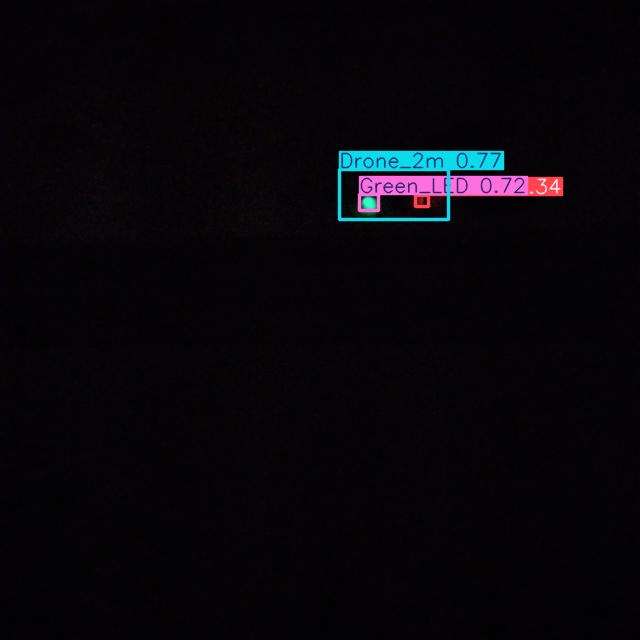

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Drone_Detection_YOLOv8.pt")

results = model(image_path)
results[0].show()

In [ ]:
import torch
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("/content/drive/MyDrive/Drone_Detection_YOLOv8.pt")  # Change to your actual trained model path

# Get the PyTorch model from the YOLO wrapper
pytorch_model = model.model
pytorch_model.eval()  # Set the model to evaluation mode

# Define a dummy input tensor (adjust input size if needed)
dummy_input = torch.randn(1, 3, 640, 640)  # (batch_size, channels, height, width)

# Convert to TorchScript using tracing
scripted_model = torch.jit.trace(pytorch_model, dummy_input)

# Save the TorchScript model as a .ptl file
scripted_model.save("yolov8s.ptl")

print("Conversion successful: yolov8s.ptl saved.")


Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider using a constant container instead (e.g. for `list`, use a `tuple` instead. for `dict`, use a `NamedTuple` instead). If you absolutely need this and know the side effects, pass strict=False to trace() to allow this behavior.


Conversion successful: yolov8s.ptl saved.


In [ ]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])

        print(f"Detected: {class_id}, Confidence: {confidence:.2f}, Location: ({x1}, {y1}) - ({x2}, {y2})")


Detected: 0, Confidence: 0.86, Location: (204, 248) - (408, 343)
Detected: 5, Confidence: 0.82, Location: (231, 301) - (266, 330)
Detected: 6, Confidence: 0.74, Location: (335, 302) - (372, 330)


In [ ]:
import os
from glob import glob

# Path to the test images
test_images_path = "/content/drive/MyDrive/Drone_Dataset/test/images"

# Get a list of all test images
test_images = glob(os.path.join(test_images_path, "*.jpg"))  # Change to "*.png" if needed
print(f"Found {len(test_images)} test images.")


Found 5 test images.


Processing: /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_084328378_jpg.rf.92c593ad86685b306570ae7ee4c6e5bb.jpg

image 1/1 /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_084328378_jpg.rf.92c593ad86685b306570ae7ee4c6e5bb.jpg: 640x640 1 Drone_1m, 1 Green_LED, 1 Red_LED, 17.0ms
Speed: 2.8ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


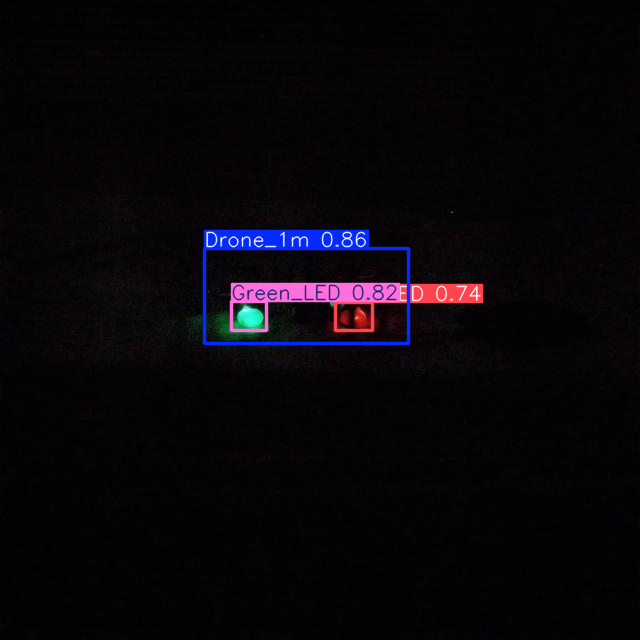

Processing: /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_090926398_jpg.rf.ceecacd8658f2f864db1f7648e788c38.jpg

image 1/1 /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_090926398_jpg.rf.ceecacd8658f2f864db1f7648e788c38.jpg: 640x640 1 Drone_2m, 1 Green_LED, 1 Red_LED, 26.1ms
Speed: 5.8ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


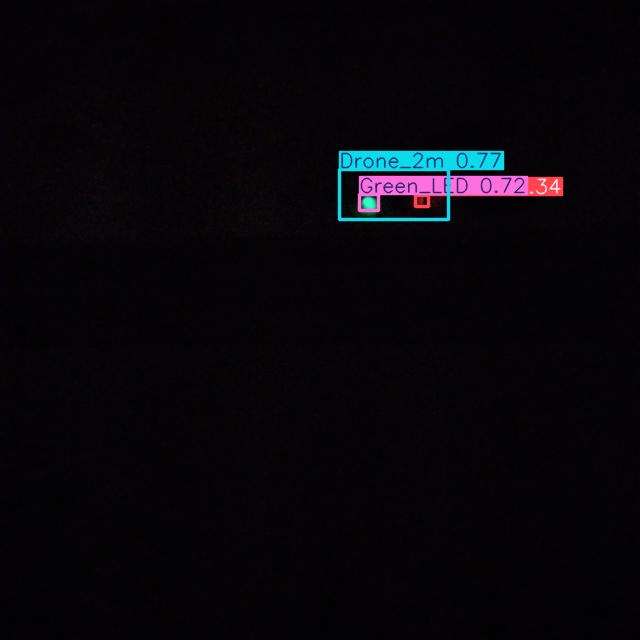

Processing: /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_091315803_jpg.rf.533424b473f2af3c7d9afb706f1f4869.jpg

image 1/1 /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_091315803_jpg.rf.533424b473f2af3c7d9afb706f1f4869.jpg: 640x640 1 Drone_3m, 1 Green_LED, 1 Red_LED, 38.9ms
Speed: 9.3ms preprocess, 38.9ms inference, 19.2ms postprocess per image at shape (1, 3, 640, 640)


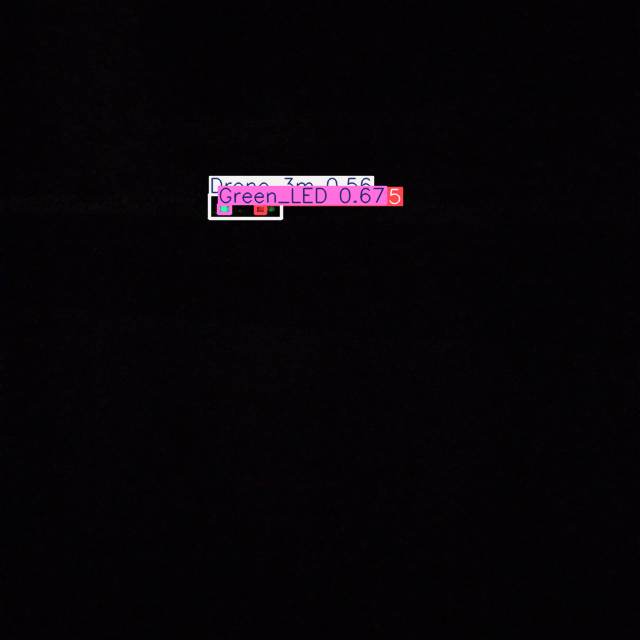

Processing: /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_092114319_jpg.rf.d5bed6a3988795948d37448c9a4ffaf6.jpg

image 1/1 /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_092114319_jpg.rf.d5bed6a3988795948d37448c9a4ffaf6.jpg: 640x640 1 Drone_4m, 1 Green_LED, 1 Red_LED, 29.9ms
Speed: 7.7ms preprocess, 29.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


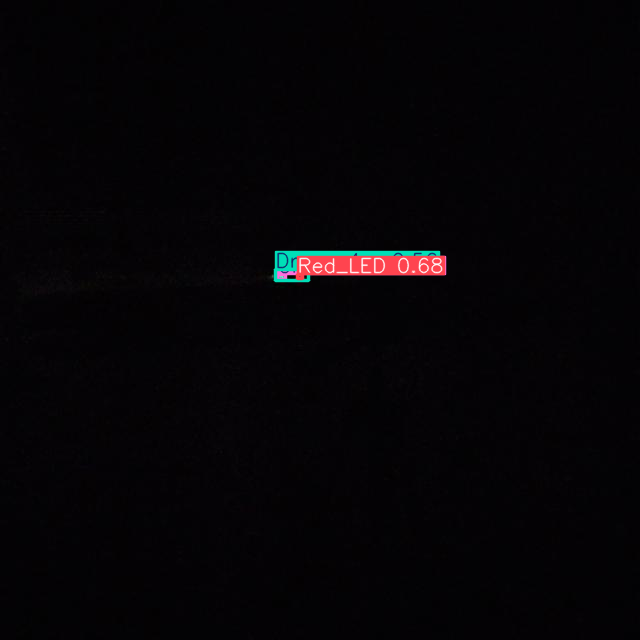

Processing: /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_092629641_jpg.rf.b9e022472e304f4eada1d89ac681ab5e.jpg

image 1/1 /content/drive/MyDrive/Drone_Dataset/test/images/IMG_20250312_092629641_jpg.rf.b9e022472e304f4eada1d89ac681ab5e.jpg: 640x640 1 Drone_3m, 1 Drone_5m, 1 Green_LED, 1 Red_LED, 44.1ms
Speed: 5.9ms preprocess, 44.1ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


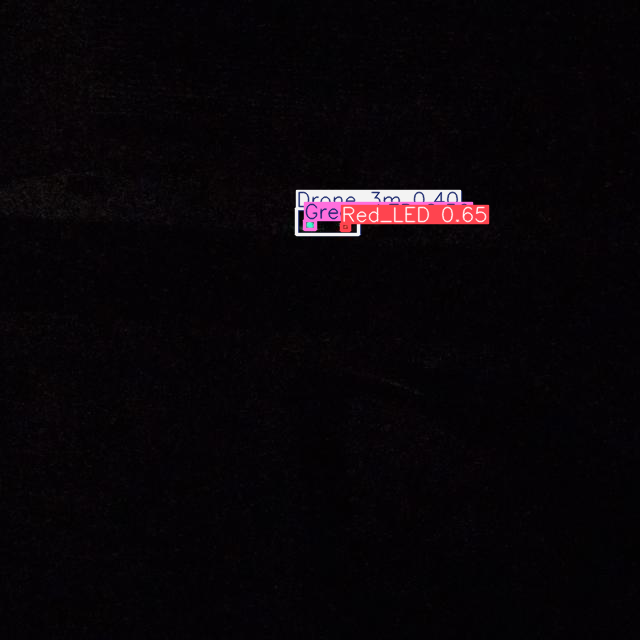

In [ ]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/Drone_Detection_YOLOv8.pt")

# Loop through each test image
for image_path in test_images:
    print(f"Processing: {image_path}")

    # Run inference
    results = model(image_path)

    # Show results using YOLO's built-in visualization
    results[0].show()
